In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import cv2

from scipy import ndimage





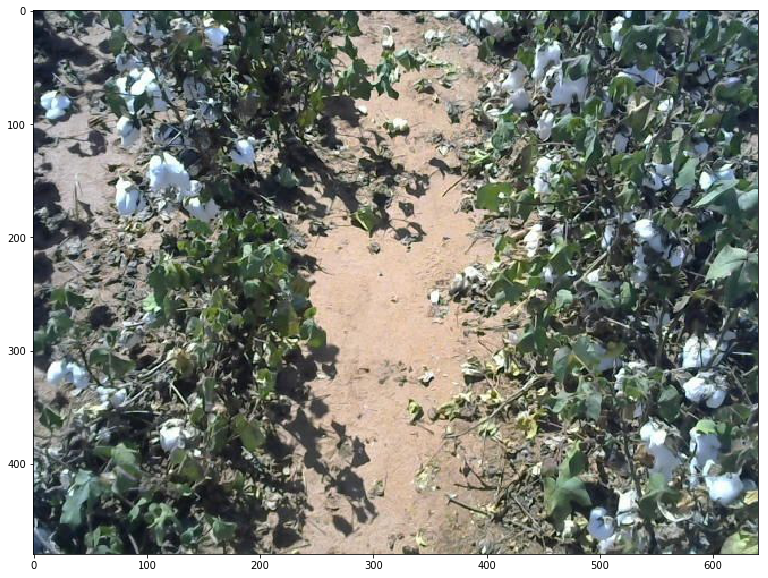

In [2]:
image = np.array(Image.open('nav_front/frame_10.jpg'))

plt.figure(figsize=(20,10))
plt.imshow(image)

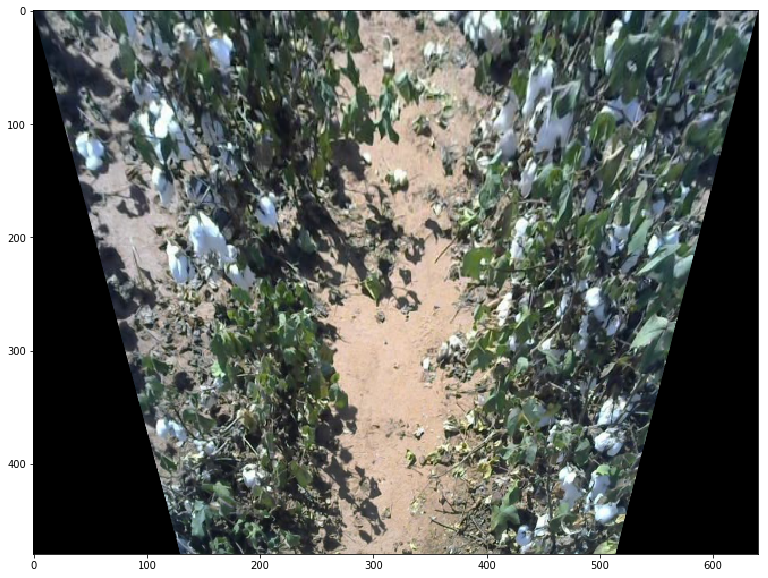

In [21]:
def skew_image(image, value = 0):

    IMAGE_H = image.shape[0]
    IMAGE_W = image.shape[1]

    aa = 250 + value
    bb = 400 + value

    src = np.float32([[200, IMAGE_H], [450, IMAGE_H], [0, 0], [IMAGE_W, 0]])
    dst = np.float32([[aa, IMAGE_H], [bb, IMAGE_H], [0, 0], [IMAGE_W, 0]])
    M = cv2.getPerspectiveTransform(src, dst) 

    warped_img = cv2.warpPerspective(image, M, (IMAGE_W, IMAGE_H)) 
    return warped_img

warped_img = skew_image(image, 0)
plt.figure(figsize=(20,10))
plt.imshow(warped_img) 


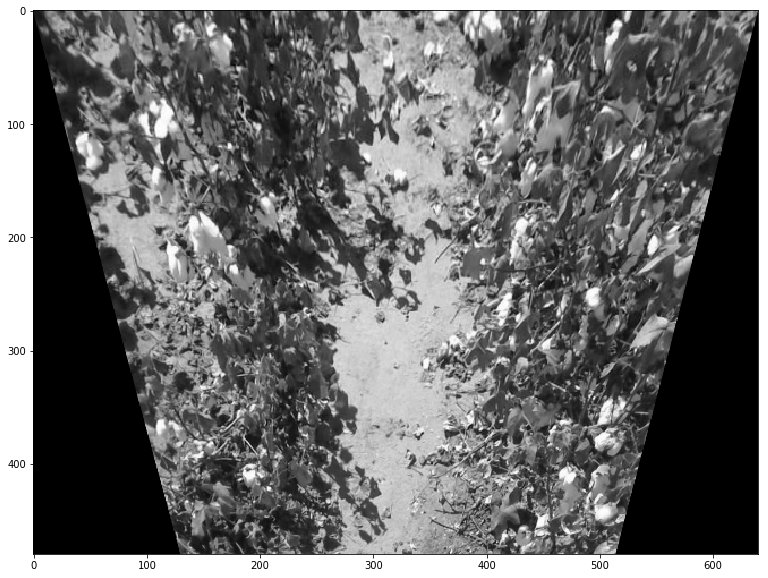

In [70]:
grayscale = cv2.cvtColor(warped_img, cv2.COLOR_RGB2GRAY)
grayscale2 = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#grayscale = ~grayscale
plt.figure(figsize=(20,10))
plt.imshow(grayscale, cmap='gray')

In [23]:
def normalize(v):
    return v / np.sqrt(np.sum(v**2))

(640,)


499312572.65902346

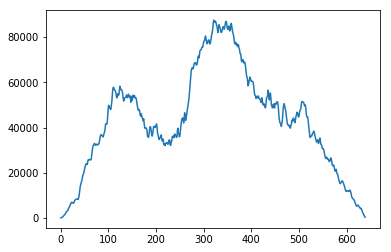

In [24]:
vector = np.sum(grayscale, axis=0)

print(vector.shape)

plt.plot(vector)

np.var(vector)

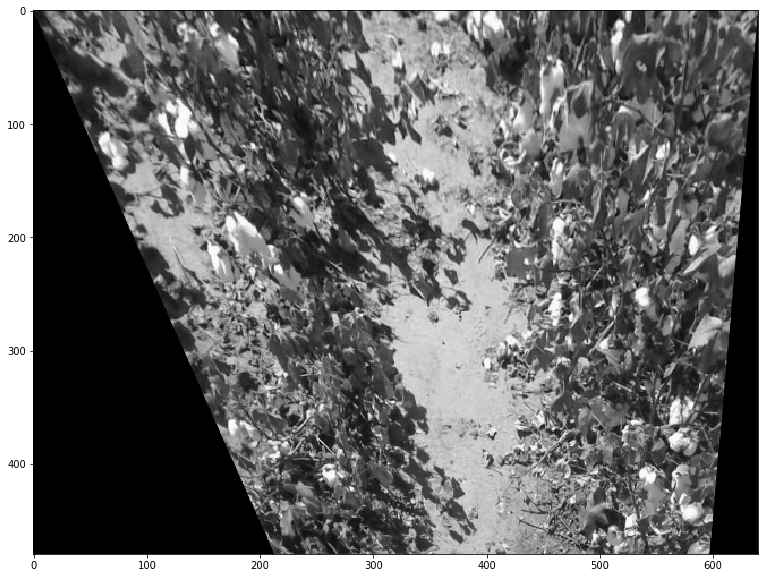

In [25]:
new_image = skew_image(grayscale2, 83)
#new_image = new_image[100:new_image.shape[0]-100, 100:new_image.shape[1]-100]
plt.figure(figsize=(20,10))
plt.imshow(new_image,cmap='gray')

(640,)


432327013.2467871

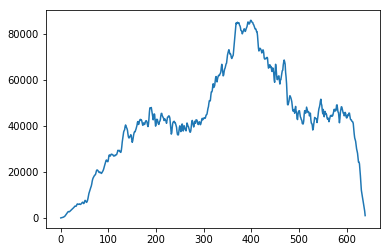

In [69]:
vector = np.sum(new_image, axis=0)

#vector = vector[50:vector.shape[0]-50]

#vector = np.true_divide(new_image.sum(0),(new_image!=0).sum(0)+1)

print(vector.shape)

plt.plot(vector)

np.var(vector)

Best angle - Max Variance
(-1, 499961564.5102514)


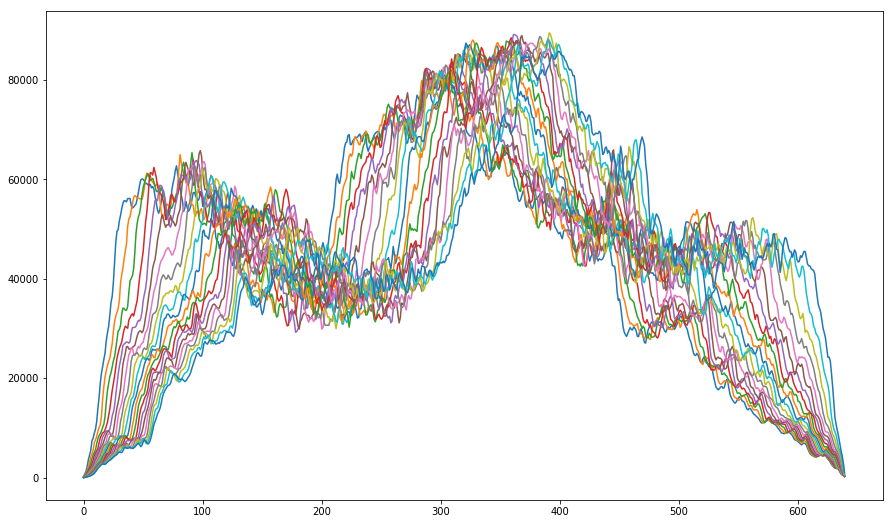

In [71]:

#theta = [(i-30) for i in range(61)]


theta = [i for i in range(-100, 101, 10)]

variance_ = []

#best_variance = np.inf
best_variance = 0
best_angle = 0
plt.figure(figsize=(15,9))
for i in theta:
    new_image = skew_image(grayscale2, i)

    #new_image[new_image == 0] = np.mean(new_image)

    #new_image = new_image[100:500, 100:600]

    vector = np.sum(new_image, axis=0)
    #vector = np.true_divide(new_image.sum(0),(new_image!=0).sum(0)+1)
    #vector = vector[100:vector.shape[0]-100]

    new_variance = np.var(vector)
    variance_.append(new_variance)

    if(new_variance > best_variance):
        best_variance = new_variance
        best_angle = i

    plt.plot(vector)

print("Best angle - Max Variance")
print(best_angle/10, best_variance)
    



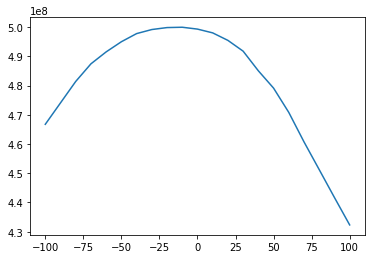

In [68]:
plt.plot(theta, variance_)

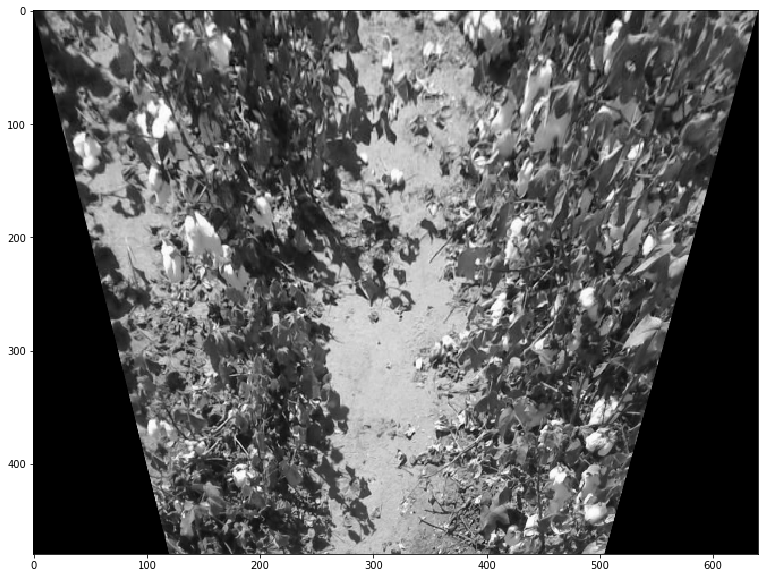

In [62]:

new_image = skew_image(grayscale2, best_angle)

#new_image[new_image == 0] = np.mean(new_image)
#new_image = new_image[100:new_image.shape[0]-100, 100:new_image.shape[1]-100]
plt.figure(figsize=(20,10))
plt.imshow(new_image,cmap='gray')

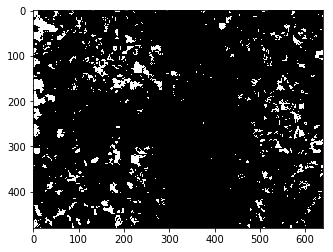

In [60]:

def exg(image):

    return  2*image[:,:,1] - image[:,:,0] - image[:,:,2]

def exr(image):
    return 1.3 * image[:,:,0] - image[:,:,1]   


def exgexr(image, th = 230):
    #print(exg(image))
    #print(exr(image))
    aux = exg(image) - exr(image)
    #print(aux)
    aux[aux < th] = 0
    aux[aux >= th] = 1
    return aux

plt.imshow(exgexr(image), cmap='gray')


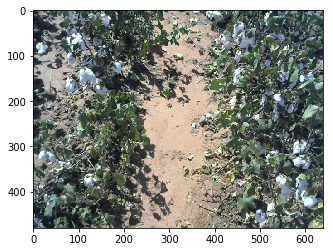

In [12]:
plt.imshow(image)

In [13]:
def cross_correlation(a,b):
    a = (a - np.mean(a)) / (np.std(a) * len(a))
    b = (b - np.mean(b)) / (np.std(b))
    return np.correlate(a, b, 'full')
